In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Constants
G  = 6.6743e-11 #m^2 kg^-1 s^-2
Me = 5.972e24 #kg
Mm = 7.35e22 #kg
Re = 6.3781e6 #m
Rm = 1.7381e6 #m
wm = 7.272e-5 #rad/s

# Part 1

In [2]:
# constants
alpha = 0
g = 9.81 #m/s

h = 4e3 #m

#question 1
fft = np.sqrt(2.*h/g) #free fall time
print(f"Algebraic solution for free fall time: {fft} seconds")

Algebraic solution for free fall time: 28.55686245854129 seconds


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  1.111e+01  3.000e+01]
        y: [[ 0.000e+00 -4.905e-08 ... -6.056e+02 -4.414e+03]
            [ 0.000e+00 -9.810e-04 ... -1.090e+02 -2.943e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001B230CD15B0>
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
Numerical solution for free fall time: 28.556862458541303 seconds


Text(629.5277777777777, 0.5, 'Velocity (m/s)')

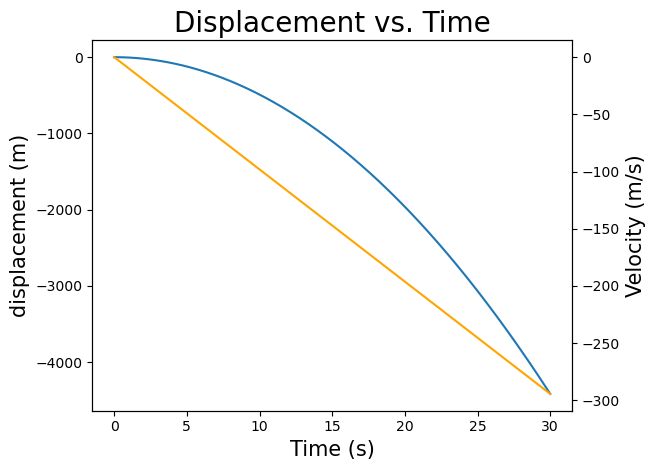

In [3]:
# Questions 2-4

def der(t, s):
    y = s[0]
    yDot = s[1]
    dydt = yDot
    dyDotdt = -g
    return (dydt, dyDotdt)

def event(t,s):
    return s[0]+h

s0 = (0, 0)

soln = solve_ivp(der, t_span=(0,30), y0=s0, events=event, dense_output=True)
print(soln)
print(f"Numerical solution for free fall time: {soln.t_events[0][0]} seconds")

fig, ax = plt.subplots(1,1)
ts = np.linspace(0, 30, 400)
solution = soln.sol(ts)
ax.plot(ts, solution[0], label="position")
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("displacement (m)", fontsize=15)
ax.set_title("Displacement vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(ts, solution[1], color="orange", label="velocity")
fig.tight_layout()
ax2.set_ylabel("Velocity (m/s)", fontsize=15)

### Figure 1

# Part 2


28.57565908679822
0.018796628256929182


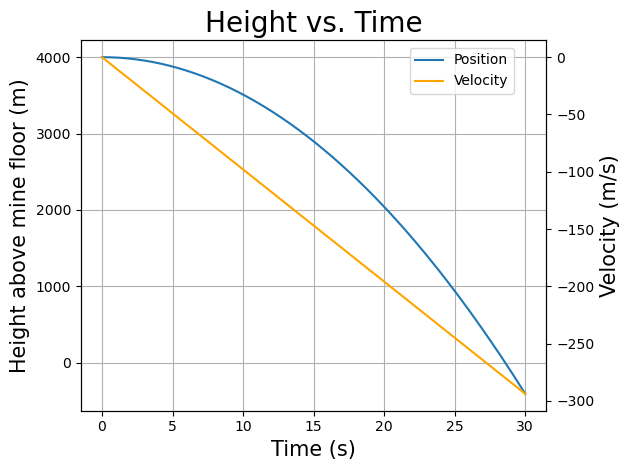

In [4]:
#question 1

g0= G*Me/Re**2 #m/s^2
rMine = Re-h #meters

def g(r):
    return g0*r/Re

def der(t,s, alpha, gamma):
    y = s[0]
    yDot = s[1]
    yDdot = -g(s[0]) - alpha*np.abs((yDot)**gamma)*np.sign(yDot) #make sure drag always points opposite direcion of motion
    return np.array((yDot, yDdot))

def event(t, s, alpha, gamma):
    return s[0]-rMine

tSpan = (0,30)
ts = np.linspace(tSpan[0],tSpan[1],200)
yi = (Re, 0)

soln = solve_ivp(der, t_span = tSpan, t_eval = ts, args=(0, 2), y0 = yi, events=event)
print(soln.t_events[0][0])
print(soln.t_events[0][0]-fft)

fig, ax = plt.subplots(1,1)
ax.plot(soln.t, soln.y[0]-rMine, label="Position")
ax.grid()
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Height above mine floor (m)", fontsize=15)
ax.set_title("Height vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(soln.t, soln.y[1], label="Velocity", color="orange")
fig.legend(loc = (0.65, 0.8))
ax2.set_ylabel("Velocity (m/s)", fontsize=15)
fig.tight_layout()

## Figure 2

Question 2: <br>
If the radius dependance of gravity is taken into effect, then the object will accelerate slightly slower than if we assumed a constant gravity, as some amount of the Earth's mass is now outside the object and is no longer accerating the object towards the center of the Earth. Since the depth of the mine is less than 1% the radius fo the Earth, the effect is essentially negigable, and only changes the time at which the object impacts the floor of the mine by 0.02 seconds.

83.359530872868
54.80266841432672


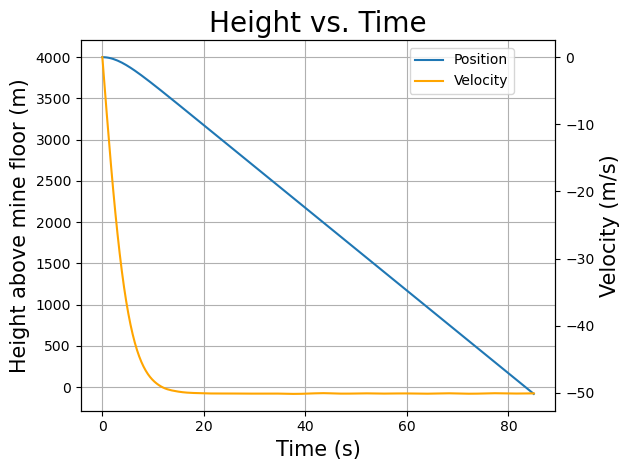

In [5]:
#Question 3
tSpan = (0,85)
ts = np.linspace(tSpan[0],tSpan[1],200)
yi = (Re, 0)

soln = solve_ivp(der, t_span = tSpan, t_eval = ts, args=(0.0039, 2), y0 = yi, events=event)
print(soln.t_events[0][0])
print(soln.t_events[0][0]-fft)

fig, ax = plt.subplots(1,1)
ax.plot(soln.t, soln.y[0]-rMine, label="Position")
ax.grid()
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Height above mine floor (m)", fontsize=15)
ax.set_title("Height vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(soln.t, soln.y[1], label="Velocity", color="orange")
fig.legend(loc = (0.65, 0.8))
ax2.set_ylabel("Velocity (m/s)", fontsize=15)
fig.tight_layout()

Including a drag term increases the fall time significantly, since at some point, the object will no longer be able to accelerate any more. For this plot, I found a drag coefficent which makes the terminal velocity 50 m/s which corresponds to a drag coefficient of $\alpha=0.0039$.

# Part 3

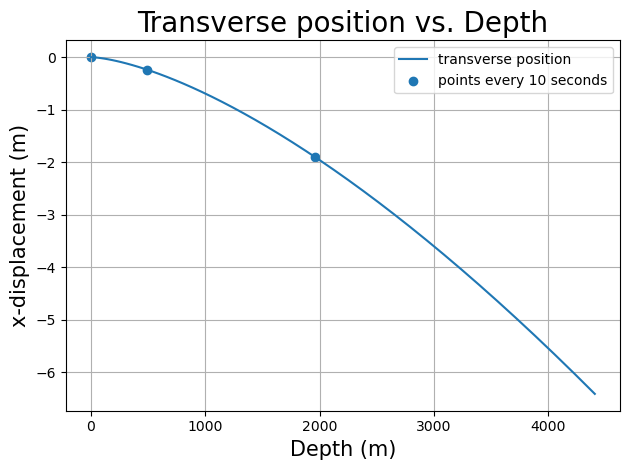

In [57]:
def derC(t,s, alpha, gamma, omega):
    x, y, z = s[0:3]
    xDot, yDot, zDot = s[3:6]
    a_cx = 2*omega*yDot
    a_cy = -2*omega*xDot
    a_gy = -g(s[1])
    a_dy = -alpha*np.abs((yDot)**gamma)*np.sign(yDot) #make sure drag always points opposite to velocity

    xDdot = a_cx
    yDdot = a_gy + a_dy + a_cy
    zDdot = 0
    return np.array((xDot, yDot, zDot, xDdot, yDdot, zDdot))

def event(t, s, alpha, gamma, omega):
    return s[1]-rMine

tSpan = (0,30)
tEval = np.linspace(tSpan[0], tSpan[1], 50)
s0 = (0,Re,0,0,0,0)

soln = solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0, 2,wm), dense_output=True, events=event)#solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0.0039, 2,wm), dense_output=True, events=event)
t_hit = soln.t_events[0][0]

fig, ax = plt.subplots(1,1)
#time_dense = 
ax.plot(Re-soln.y[1], soln.y[0], label="transverse position")
timePoints = np.arange(tSpan[0], t_hit, 10)
ax.scatter(Re-soln.sol(timePoints)[1], soln.sol(timePoints)[0], label="points every 10 seconds")
ax.set_xlabel("Depth (m)", fontsize=15)
ax.set_ylabel("x-displacement (m)", fontsize=15)
ax.set_title("Transverse position vs. Depth", fontsize=20)
ax.legend()
ax.grid()
fig.tight_layout()